# Singular Value Decomposition (SVD)

## Introduction

Singular Value Decomposition (SVD) is one of the most fundamental and powerful matrix factorization techniques in linear algebra. It provides a way to decompose any matrix into a product of three matrices with special properties, revealing the intrinsic geometric structure of linear transformations.

## Mathematical Foundation

### The SVD Theorem

For any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, there exists a factorization of the form:

$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$$

where:
- $\mathbf{U} \in \mathbb{R}^{m \times m}$ is an orthogonal matrix (left singular vectors)
- $\mathbf{\Sigma} \in \mathbb{R}^{m \times n}$ is a diagonal matrix with non-negative entries (singular values)
- $\mathbf{V} \in \mathbb{R}^{n \times n}$ is an orthogonal matrix (right singular vectors)

### Properties of the Decomposition

The singular values $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r > 0$ (where $r = \text{rank}(\mathbf{A})$) satisfy:

$$\sigma_i = \sqrt{\lambda_i(\mathbf{A}^T\mathbf{A})} = \sqrt{\lambda_i(\mathbf{A}\mathbf{A}^T)}$$

where $\lambda_i$ denotes the $i$-th eigenvalue.

### Geometric Interpretation

The SVD reveals that any linear transformation can be decomposed into three operations:
1. **Rotation/Reflection** ($\mathbf{V}^T$): Rotate the input space
2. **Scaling** ($\mathbf{\Sigma}$): Scale along coordinate axes
3. **Rotation/Reflection** ($\mathbf{U}$): Rotate the output space

### Low-Rank Approximation

The Eckart-Young-Mirsky theorem states that the best rank-$k$ approximation to $\mathbf{A}$ in the Frobenius norm is:

$$\mathbf{A}_k = \sum_{i=1}^{k} \sigma_i \mathbf{u}_i \mathbf{v}_i^T$$

with approximation error:

$$\|\mathbf{A} - \mathbf{A}_k\|_F = \sqrt{\sum_{i=k+1}^{r} \sigma_i^2}$$

## Applications

- **Image Compression**: Storing only the largest singular values and vectors
- **Dimensionality Reduction**: Principal Component Analysis (PCA)
- **Noise Reduction**: Filtering out small singular values
- **Recommender Systems**: Matrix completion problems
- **Natural Language Processing**: Latent Semantic Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# Set random seed for reproducibility
np.random.seed(42)

# Create a sample matrix for demonstration
# We'll create a low-rank matrix with added noise
m, n = 50, 40
true_rank = 5

# Generate a low-rank matrix
U_true = np.random.randn(m, true_rank)
V_true = np.random.randn(true_rank, n)
A_clean = U_true @ V_true

# Add some noise
noise_level = 0.5
noise = noise_level * np.random.randn(m, n)
A = A_clean + noise

print(f"Matrix A shape: {A.shape}")
print(f"Matrix A rank (numerical): {np.linalg.matrix_rank(A)}")

Matrix A shape: (50, 40)
Matrix A rank (numerical): 40


In [2]:
# Perform Singular Value Decomposition
U, sigma, Vt = svd(A, full_matrices=False)

print(f"U shape: {U.shape}")
print(f"Sigma shape: {sigma.shape}")
print(f"V^T shape: {Vt.shape}")
print(f"\nFirst 10 singular values:")
print(sigma[:10])

U shape: (50, 40)
Sigma shape: (40,)
V^T shape: (40, 40)

First 10 singular values:
[69.66278651 45.7159416  41.72602208 29.67040275 21.86618244  6.07753042
  5.74345956  5.6103442   5.10524301  4.93832771]


In [3]:
# Verify the decomposition: A ≈ U @ diag(sigma) @ Vt
A_reconstructed = U @ np.diag(sigma) @ Vt
reconstruction_error = np.linalg.norm(A - A_reconstructed, 'fro')
print(f"Full reconstruction error (Frobenius norm): {reconstruction_error:.2e}")

# Verify orthogonality of U and V
U_orthogonality = np.linalg.norm(U.T @ U - np.eye(U.shape[1]), 'fro')
V_orthogonality = np.linalg.norm(Vt @ Vt.T - np.eye(Vt.shape[0]), 'fro')
print(f"U orthogonality error: {U_orthogonality:.2e}")
print(f"V orthogonality error: {V_orthogonality:.2e}")

Full reconstruction error (Frobenius norm): 1.52e-13
U orthogonality error: 8.23e-15
V orthogonality error: 8.82e-15


In [4]:
# Low-rank approximation
def low_rank_approximation(U, sigma, Vt, k):
    """Compute rank-k approximation of matrix."""
    return U[:, :k] @ np.diag(sigma[:k]) @ Vt[:k, :]

# Compute approximation errors for different ranks
ranks = np.arange(1, min(m, n) + 1)
errors = []
cumulative_energy = []

total_energy = np.sum(sigma**2)
for k in ranks:
    A_k = low_rank_approximation(U, sigma, Vt, k)
    error = np.linalg.norm(A - A_k, 'fro')
    errors.append(error)
    energy = np.sum(sigma[:k]**2) / total_energy
    cumulative_energy.append(energy)

errors = np.array(errors)
cumulative_energy = np.array(cumulative_energy)

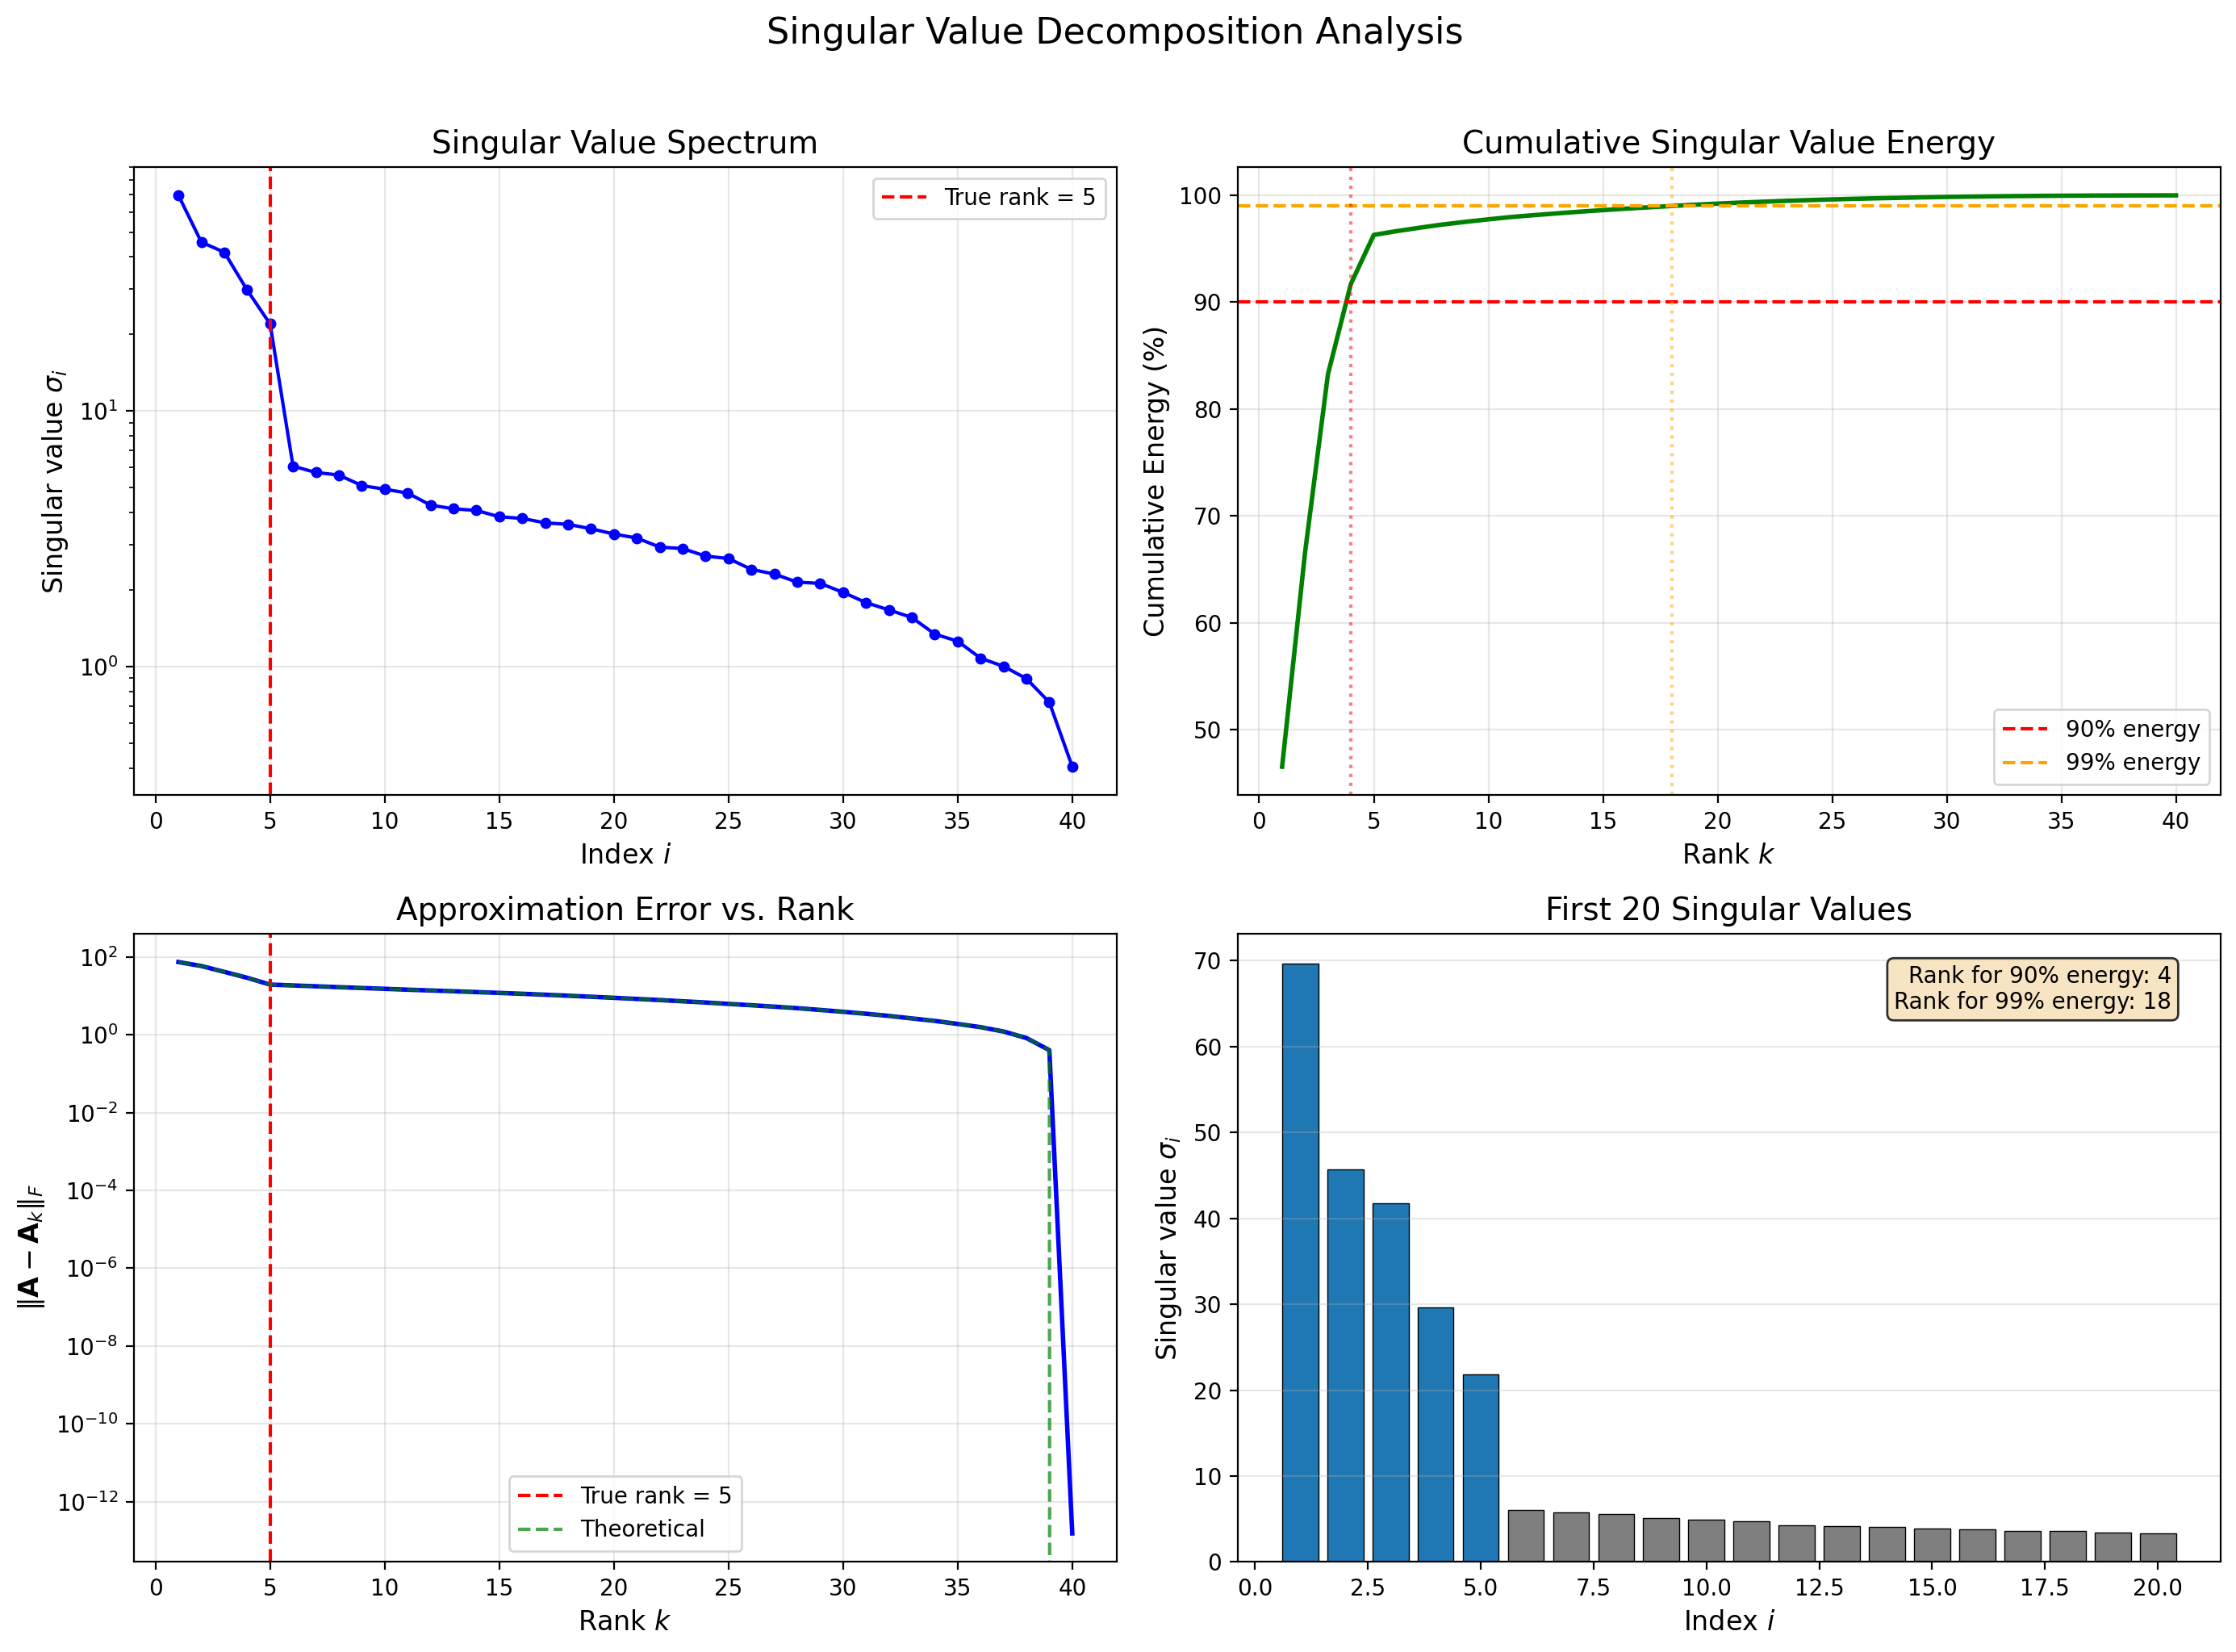


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Singular value spectrum
ax1 = axes[0, 0]
ax1.semilogy(np.arange(1, len(sigma) + 1), sigma, 'b-o', markersize=4)
ax1.axvline(x=true_rank, color='r', linestyle='--', label=f'True rank = {true_rank}')
ax1.set_xlabel('Index $i$', fontsize=12)
ax1.set_ylabel('Singular value $\\sigma_i$', fontsize=12)
ax1.set_title('Singular Value Spectrum', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative energy
ax2 = axes[0, 1]
ax2.plot(ranks, cumulative_energy * 100, 'g-', linewidth=2)
ax2.axhline(y=90, color='r', linestyle='--', label='90% energy')
ax2.axhline(y=99, color='orange', linestyle='--', label='99% energy')
# Find ranks that capture 90% and 99% energy
rank_90 = np.argmax(cumulative_energy >= 0.90) + 1
rank_99 = np.argmax(cumulative_energy >= 0.99) + 1
ax2.axvline(x=rank_90, color='r', linestyle=':', alpha=0.5)
ax2.axvline(x=rank_99, color='orange', linestyle=':', alpha=0.5)
ax2.set_xlabel('Rank $k$', fontsize=12)
ax2.set_ylabel('Cumulative Energy (%)', fontsize=12)
ax2.set_title('Cumulative Singular Value Energy', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Approximation error vs rank
ax3 = axes[1, 0]
ax3.semilogy(ranks, errors, 'b-', linewidth=2)
ax3.axvline(x=true_rank, color='r', linestyle='--', label=f'True rank = {true_rank}')
# Theoretical error: sqrt(sum of remaining singular values squared)
theoretical_errors = np.array([np.sqrt(np.sum(sigma[k:]**2)) for k in ranks])
ax3.semilogy(ranks, theoretical_errors, 'g--', linewidth=1.5, alpha=0.7, label='Theoretical')
ax3.set_xlabel('Rank $k$', fontsize=12)
ax3.set_ylabel('$\\|\\mathbf{A} - \\mathbf{A}_k\\|_F$', fontsize=12)
ax3.set_title('Approximation Error vs. Rank', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Visual comparison of original and low-rank approximations
ax4 = axes[1, 1]
# Show singular values as bar chart with color coding
colors = ['tab:blue' if i < true_rank else 'tab:gray' for i in range(len(sigma[:20]))]
bars = ax4.bar(np.arange(1, 21), sigma[:20], color=colors, edgecolor='black', linewidth=0.5)
ax4.set_xlabel('Index $i$', fontsize=12)
ax4.set_ylabel('Singular value $\\sigma_i$', fontsize=12)
ax4.set_title('First 20 Singular Values', fontsize=14)
ax4.grid(True, alpha=0.3, axis='y')

# Add text annotations
textstr = f'Rank for 90% energy: {rank_90}\nRank for 99% energy: {rank_99}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax4.text(0.95, 0.95, textstr, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=props)

plt.suptitle('Singular Value Decomposition Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('singular_value_decomposition_svd_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to 'plot.png'")

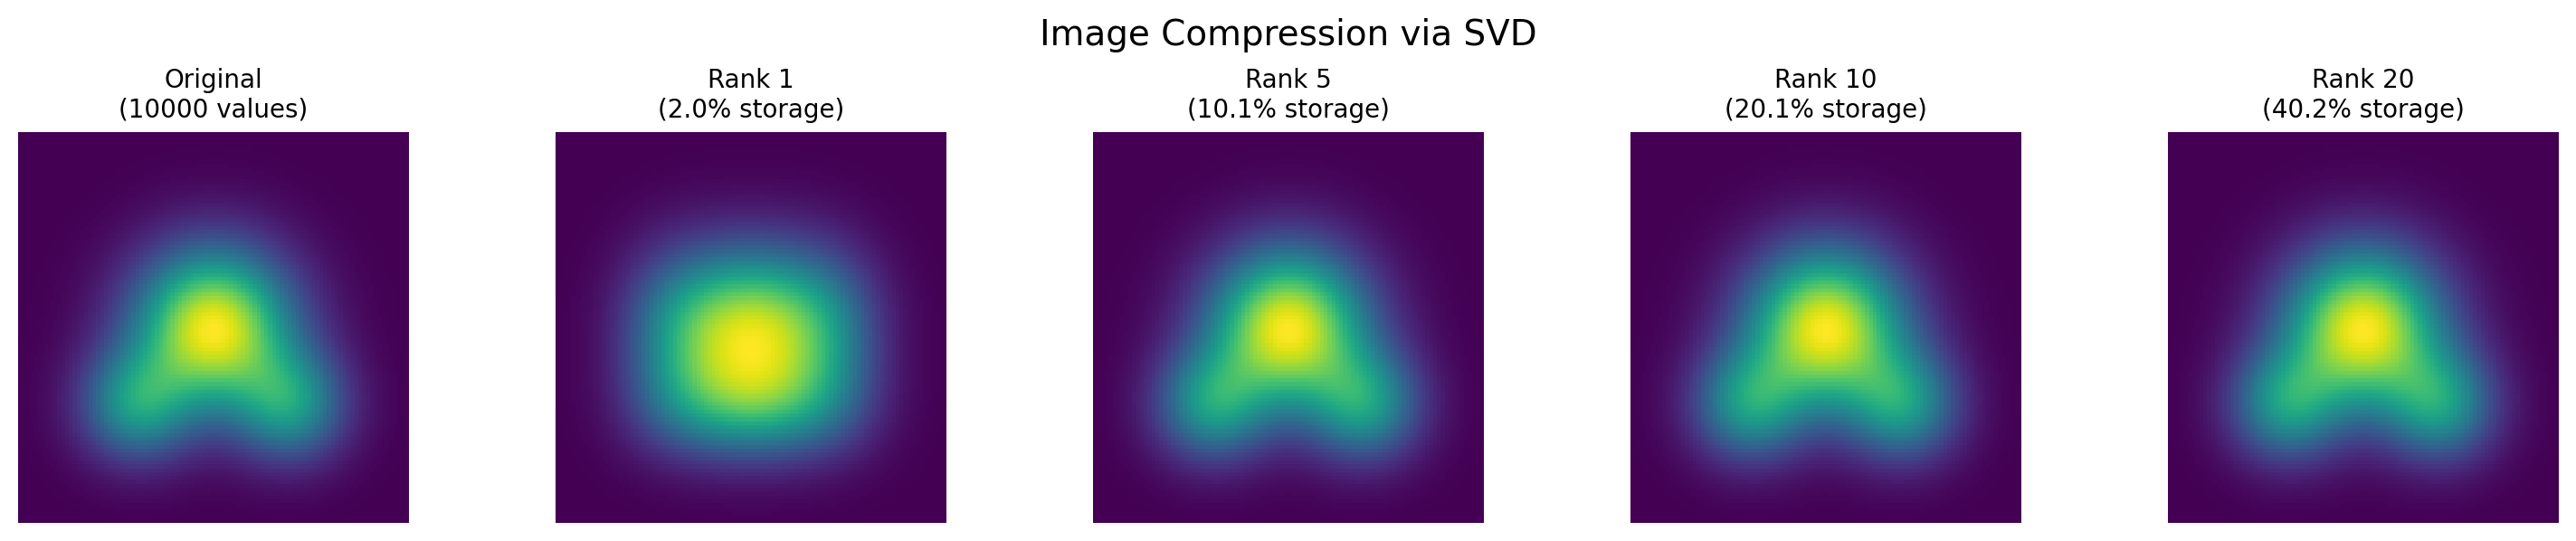

In [6]:
# Demonstrate image compression using SVD
# Create a synthetic grayscale image
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create an image with some structure (sum of Gaussians)
image = (np.exp(-(X**2 + Y**2)/4) + 
         0.5 * np.exp(-((X-2)**2 + (Y-2)**2)/2) +
         0.5 * np.exp(-((X+2)**2 + (Y-2)**2)/2))

# Perform SVD on the image
U_img, sigma_img, Vt_img = svd(image, full_matrices=False)

# Create compressed versions
compression_ranks = [1, 5, 10, 20]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Original image
axes[0].imshow(image, cmap='viridis')
axes[0].set_title(f'Original\n({image.size} values)', fontsize=10)
axes[0].axis('off')

# Compressed images
for idx, k in enumerate(compression_ranks):
    compressed = low_rank_approximation(U_img, sigma_img, Vt_img, k)
    compression_ratio = (k * (image.shape[0] + image.shape[1] + 1)) / image.size
    axes[idx + 1].imshow(compressed, cmap='viridis')
    axes[idx + 1].set_title(f'Rank {k}\n({compression_ratio*100:.1f}% storage)', fontsize=10)
    axes[idx + 1].axis('off')

plt.suptitle('Image Compression via SVD', fontsize=14)
plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored the Singular Value Decomposition (SVD), demonstrating:

1. **Mathematical properties**: Verified orthogonality of $\mathbf{U}$ and $\mathbf{V}$, and the reconstruction accuracy

2. **Singular value spectrum**: The rapid decay of singular values reveals the effective rank of the matrix

3. **Low-rank approximation**: The cumulative energy plot shows how many singular values are needed to capture most of the matrix's "information"

4. **Practical application**: Image compression demonstrates how SVD can efficiently represent data with far fewer parameters

### Key Takeaways

- SVD is numerically stable and always exists for any matrix
- The singular values quantify the "importance" of each component
- Low-rank approximations provide optimal compression in the Frobenius norm sense
- SVD is foundational to many machine learning and signal processing algorithms